# Report 02 — Turin deep-dive

This notebook adds **methodological depth** on three aspects: *data quality*, *station heterogeneity* and *sensitivity to aggregation choices*, using the city of **Turin** as an example to investigate them.


In [10]:
import pandas as pd
from IPython.display import display, Image

## Data quality

The first methodological issue adressed here is **data quality** (for more datails see `notebooks\Supplementary\cleaning_and_quality.ipynb` and `docs\methodology.md`).<br>
Data quality was measured using four main metrics, two for sensors and two for cities. 

### Sensors quality
For sensors two main metrics were used: *percent hours recorded per day* and *percent days avaiable per year*. Together, these metrics enable to adress whether each sensor has reliable mesures for daily (enough hours measured in a day) and yearly aggregate (enough days measured in a year). <br>
Regarding the *percent hours recorded per day* the plot below shows ECDF of percent hours recorded per day, for each year, parameter and sensor.

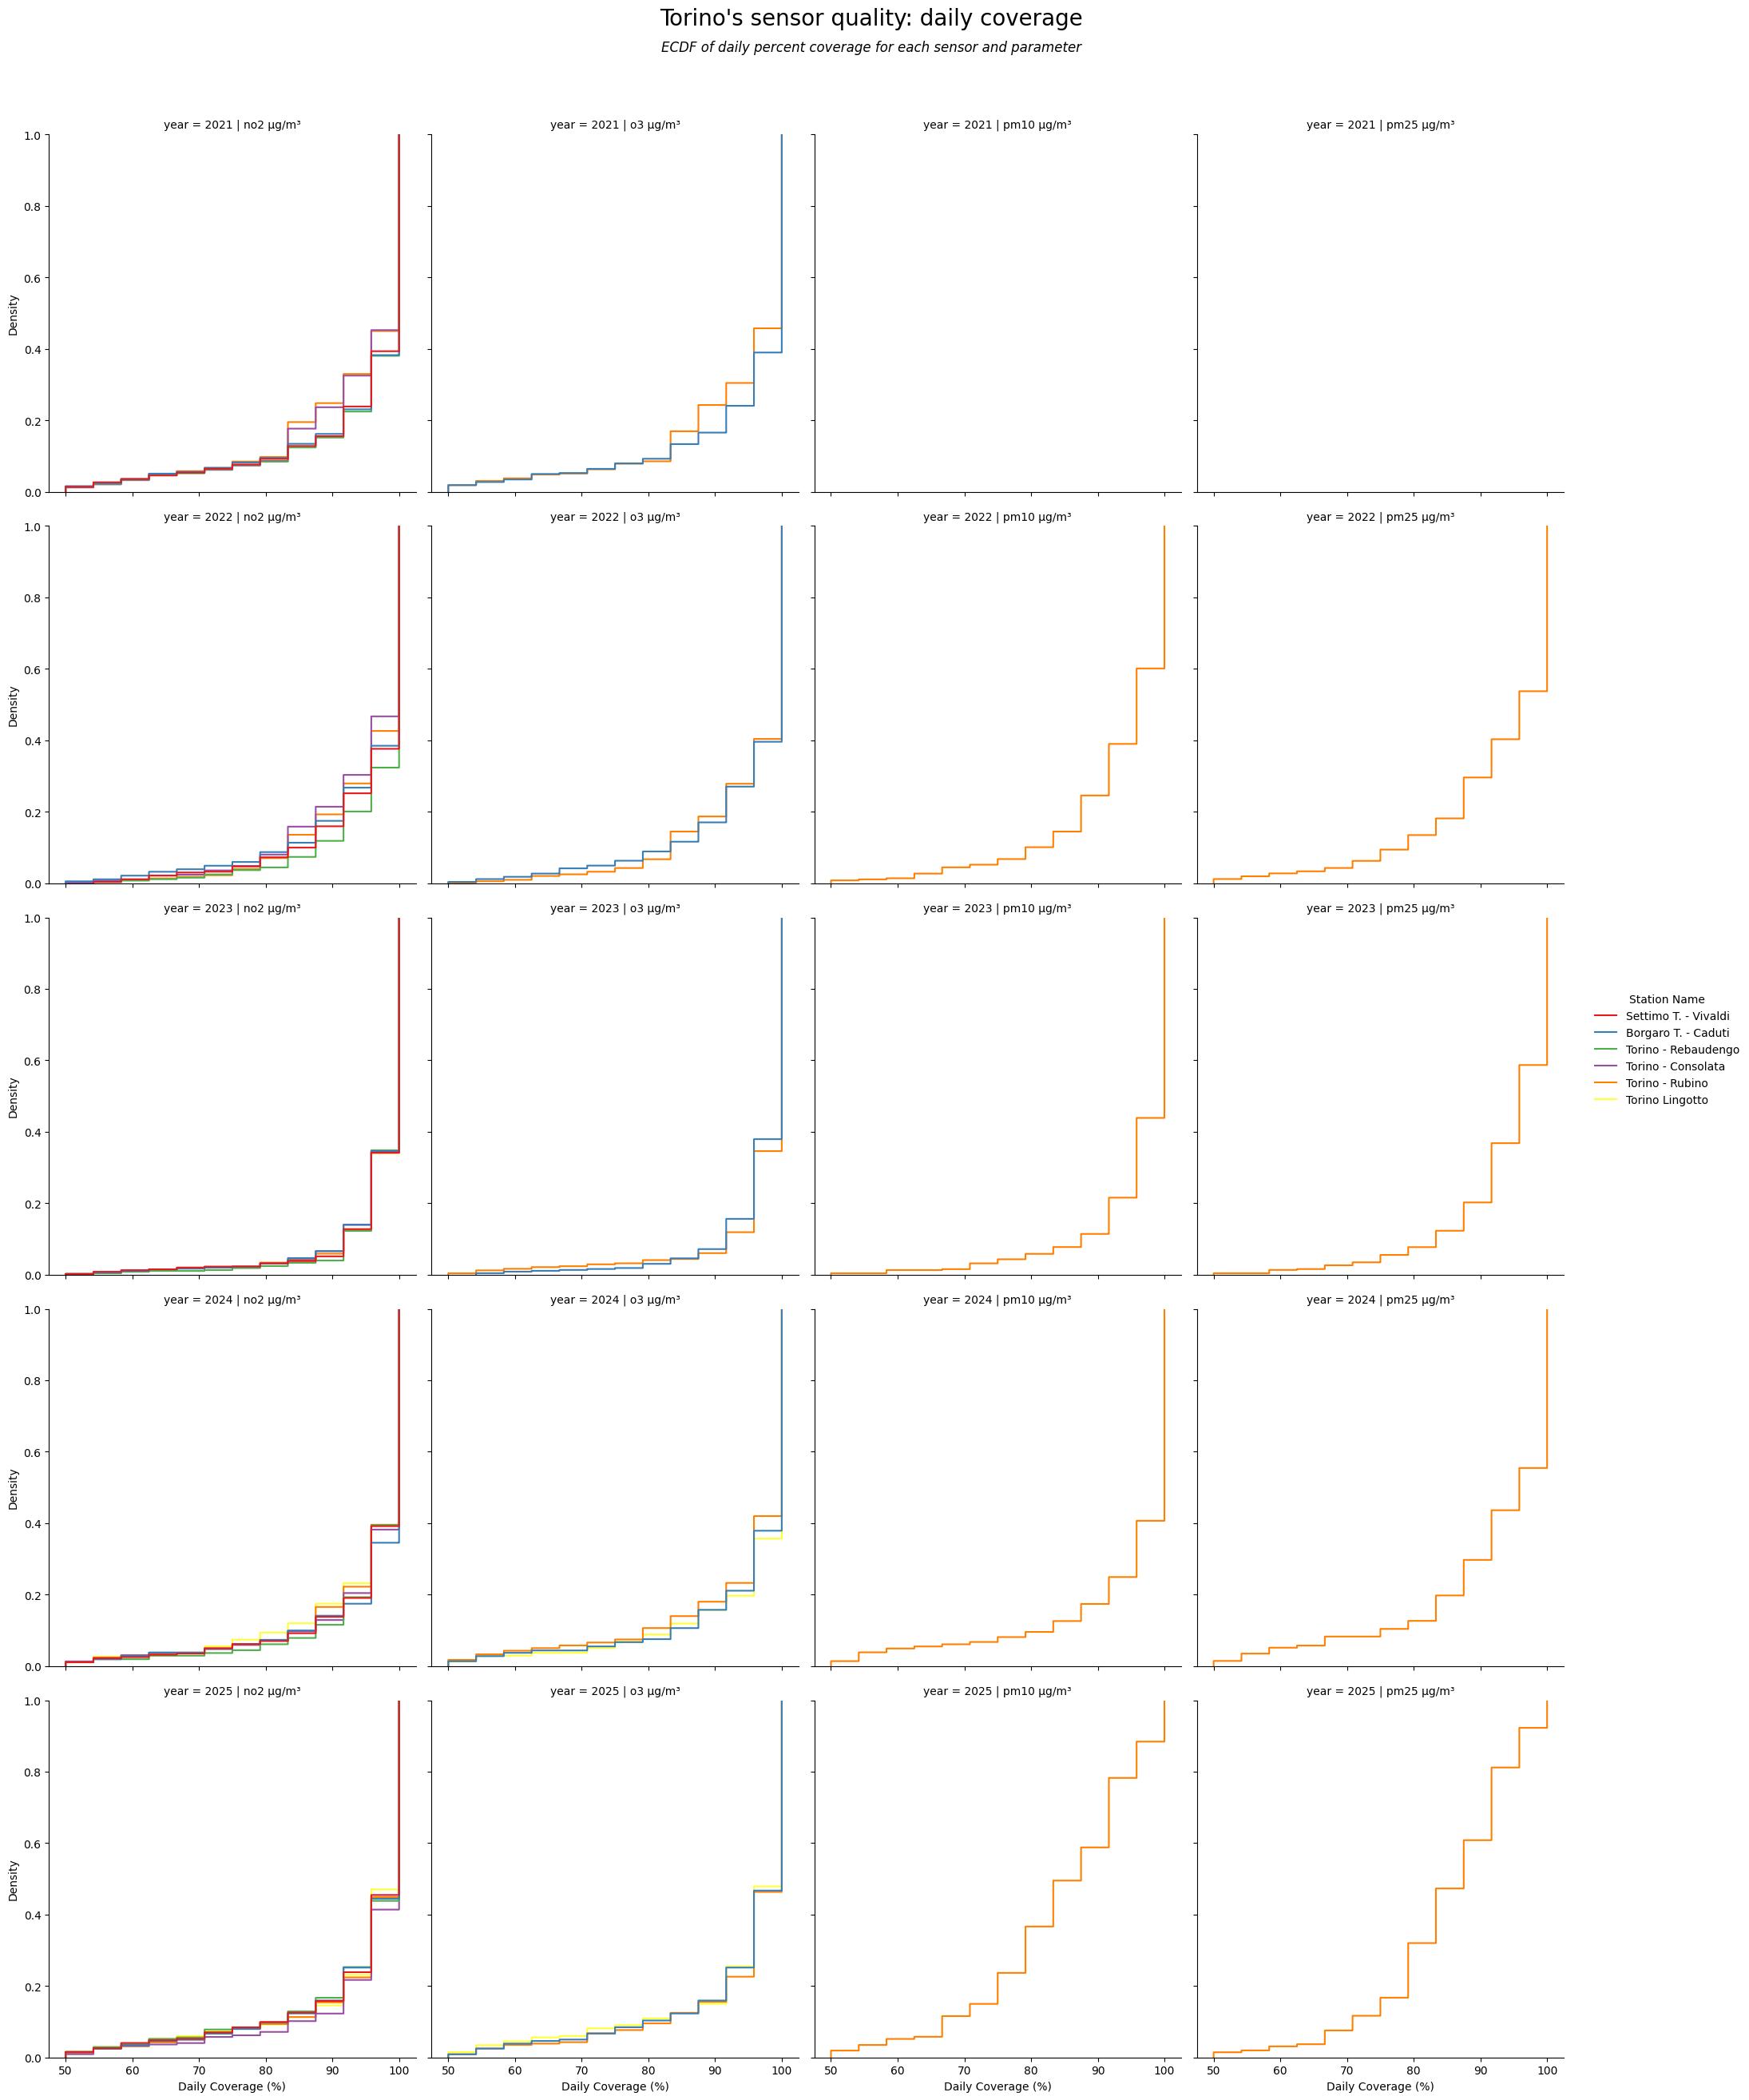

In [11]:
display(Image(filename="../results/quality_checks/deepdive/Torino_sensor_percent_coverage_per_day.png", width=1000))

In the figure, we can see that every sensor(when more than one is present), has a similar percent daily coverage for each year and parameter. Thus, regarding this metric, quality differs more between years than between each station. <br>

Regarding *percent days avaiable per year* the plot below shows how it varies across stations for each year and parameter:

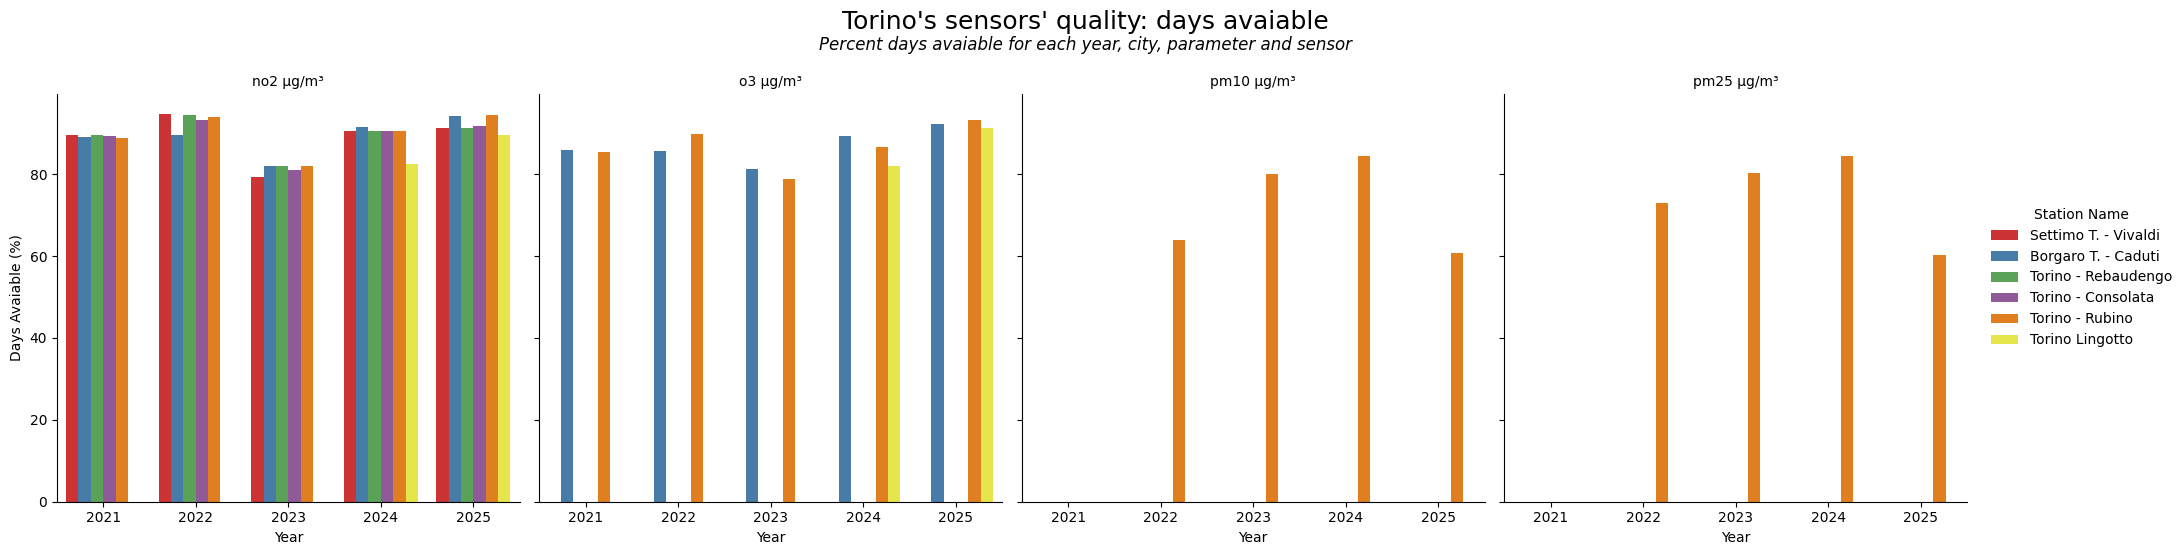

In [12]:
display(Image(filename="../results/quality_checks/deepdive/Torino_sensors_percent_coverage_per_year.png", width=1000))

Again, we can see how sensors have similar coverage for each year, while most variance is present between year. For this reason, apart from the valid sensor filter (invalid sensors are already filtere before aggregation, see `notebooks\Supplementary\cleaning_and_quality.ipynb` and `docs\methodology.md`), no flag was included for sensors.

### Cities quality

For cities two main quality metrics were emplyed: *median active sensors per day* and *percent days avaiable per year* <br>
Regarding *median active sensors per day* we can say how the number of active sensors changes across the entire timespan of the analysis (day by day) in the figure below:

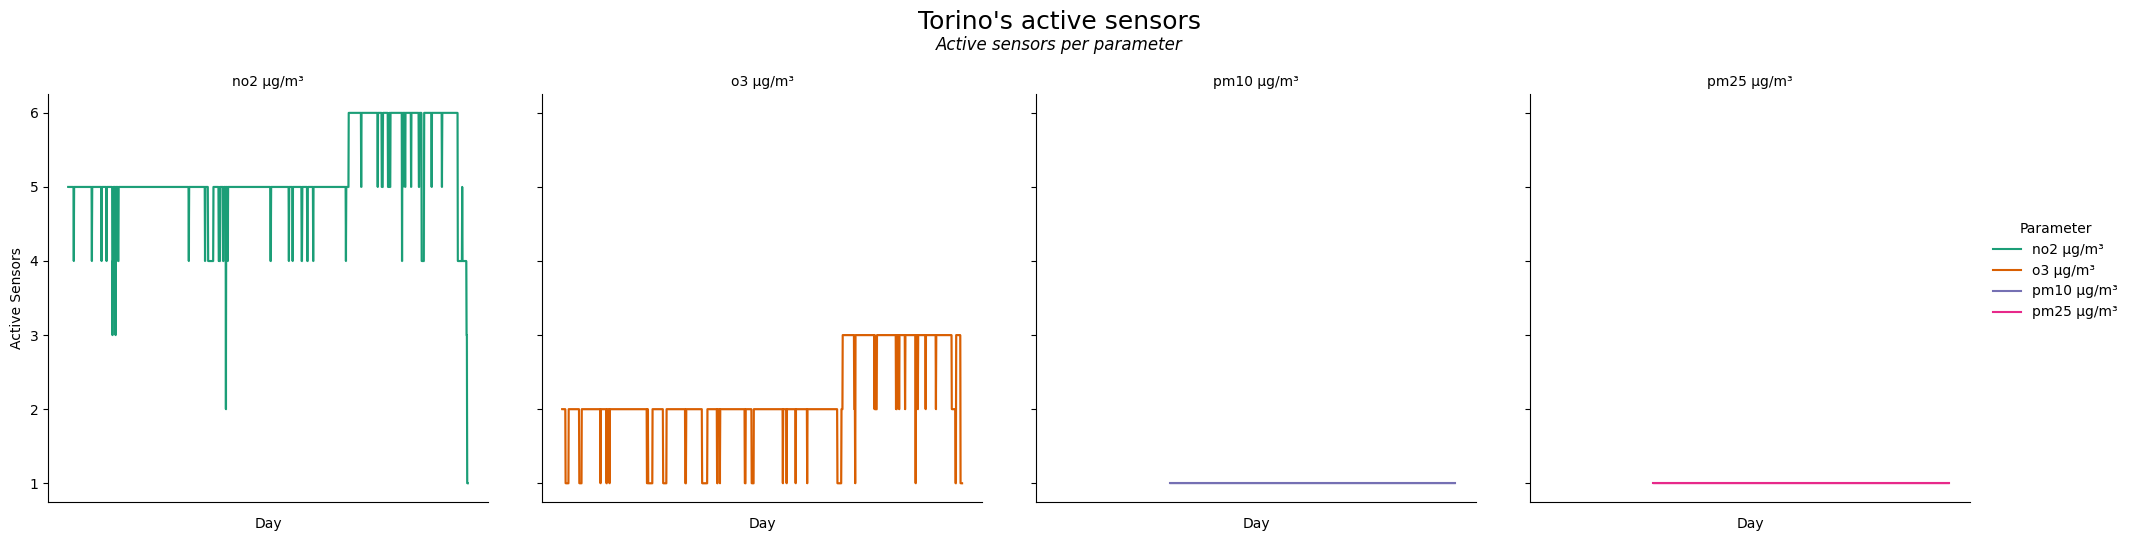

In [13]:
display(Image(filename="../results/quality_checks/deepdive/Torino_active_sensors_per_day.png", width=1000))


Here we appreciate how the number of active sensors changes over time for NO2 and O3, while for PM10 and PM2.5 only one is ever active. <br>
Regarding the *days avaiable per year*, here we show how it varies:

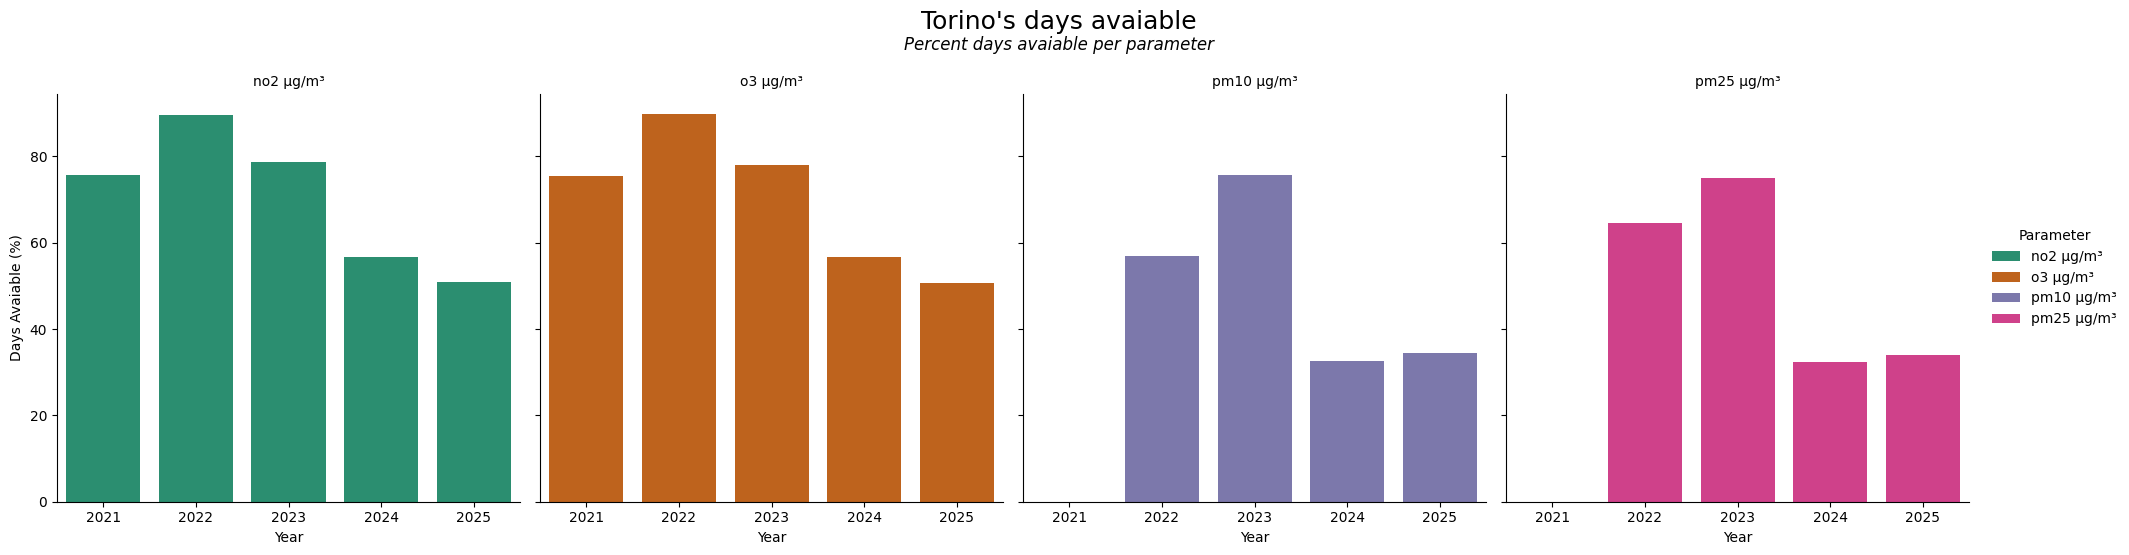

In [14]:
display(Image(filename="../results/quality_checks/deepdive/Torino_percent_days_avaiable_per_year.png", width=1000))

Even though this value is more stable across years, we included it in the flagging rules to ensure reliabily for yearly aggregation. <br>

## Station heterogeneity

Another issue worth exploring is *heterogeneity between stations measurements*. <br>

### Influence on annual means

To have an idea about the influence of station on *yearly aggregate* we calculated the annual mean separately for each station. In the table below we can appreaciate descriptive stattistics for this metric:

In [15]:
pd.read_csv("../results/quality_checks/deepdive/Torino_annual_mean_per_station_descriptive.csv")

,parameter,year,station_name,sensors_percent_coverage_per_year,count,mean,std,min,25%,50%,75%,max
0,no2 µg/m³,2021,Borgaro T. - Caduti,89.04,6064.0,25.261379,13.299889,6.625000,13.791667,22.913043,36.416667,74.300000
1,no2 µg/m³,2021,Settimo T. - Vivaldi,89.59,6094.0,31.480473,15.236279,11.583333,19.368421,26.916667,39.227273,82.250000
2,no2 µg/m³,2021,Torino - Consolata,89.32,5962.0,44.552667,16.097680,15.208333,32.875000,41.708333,52.701705,104.300000
3,no2 µg/m³,2021,Torino - Rebaudengo,89.59,6045.0,49.830935,17.672409,19.416667,37.083333,46.739130,58.300000,116.900000
4,no2 µg/m³,2021,Torino - Rubino,88.77,5934.0,25.749747,14.429772,0.000000,14.666667,21.913043,34.733696,66.750000
5,no2 µg/m³,2022,Borgaro T. - Caduti,89.59,6865.0,22.708958,12.520922,4.826087,12.416667,19.375000,30.541667,63.500000
6,no2 µg/m³,2022,Settimo T. - Vivaldi,94.79,7387.0,27.600921,13.701905,8.791667,16.416667,23.750000,37.196429,74.208333
7,no2 µg/m³,2022,Torino - Consolata,93.15,7160.0,39.441480,14.791991,10.900000,29.619048,35.681818,45.695652,87.826087
8,no2 µg/m³,2022,Torino - Rebaudengo,94.52,7487.0,47.501670,16.152155,15.208333,36.375000,44.090909,55.652174,109.478261
9,no2 µg/m³,2022,Torino - Rubino,93.97,7361.0,26.221166,14.794560,2.000000,13.416667,22.173913,38.250000,65.541667


Expecially when more stations are present, we can appreciate some variance between them, with some station probably being closer to some pollution sources of the city, but overall, most results seem to be robust in this respect, as there is no extreme difference between means. <br>

### Influence on exceedance days

Another aggregation, which potentially is more sensible to station heterogeneity is the *number of exceedance days*. To assess how this metric is affected by station heterogeneity, we show a table with this metric computed separately for each station(O3 was exluded for lack of data about max rolling 8h mean for each station):

In [16]:
pd.read_csv("../results/quality_checks/deepdive/Torino_exceedance_days_per_station_descriptive.csv")

,parameter,year,station_name,sensors_percent_coverage_per_year,exceedance_days_per_station
0,no2 µg/m³,2021,Borgaro T. - Caduti,89.04,9
1,no2 µg/m³,2021,Settimo T. - Vivaldi,89.59,35
2,no2 µg/m³,2021,Torino - Consolata,89.32,79
3,no2 µg/m³,2021,Torino - Rebaudengo,89.59,113
4,no2 µg/m³,2021,Torino - Rubino,88.77,22
5,no2 µg/m³,2022,Borgaro T. - Caduti,89.59,11
6,no2 µg/m³,2022,Settimo T. - Vivaldi,94.79,22
7,no2 µg/m³,2022,Torino - Consolata,93.15,66
8,no2 µg/m³,2022,Torino - Rebaudengo,94.52,119
9,no2 µg/m³,2022,Torino - Rubino,93.97,25


This time, the table present important variance between stations, indicating that for such less robust metric, station heterogeneity plays a more important role. This suggests that potentially some parts of the city are differently exposed to high daily concentration, and daily aggregates may not fully capture the high exposure of some zones: for example Torino - Rebaudengo records expecially high numbers of exceedance days for NO2 compared to the other stations, and the aggregate value underestimate the exposure to high concentration of inhabitants who live in this area. <br>
To confront this values with the aggregated value, here we provide the general table filtered for Turin.


In [17]:
df = pd.read_csv("../results/compliance_table.csv")
df = df[df['City'] == "Torino"]
df[['Parameter', 'Year', 'Yearly Average (µg/m³)', 'Days above limit value']].reset_index()

,index,Parameter,Year,Yearly Average (µg/m³),Days above limit value
0,19,no2 µg/m³,2021,35.03,50
1,20,no2 µg/m³,2022,32.76,44
2,21,no2 µg/m³,2023,28.68,14
3,22,no2 µg/m³,2024,27.69,17
4,23,no2 µg/m³,2025,23.64,1
5,43,o3 µg/m³,2021,46.22,Not Applicable
6,44,o3 µg/m³,2022,55.59,Not Applicable
7,45,o3 µg/m³,2023,44.40,44.3
8,46,o3 µg/m³,2024,45.54,43.7
9,47,o3 µg/m³,2025,67.09,33.0



## Aggregation sensitivity

Finally, we check how the annual means are sensible to different daily aggregation methods which can be used (compliance is based on the mean of the daily mean value, as we have done, but it is interesting to see how this choice affects the results). In the table below we report the values and the difference between three aggregation methods: the mean of *daily mean values*, the mean of daily *median* values, and the mean of daily *max* values:

In [18]:
pd.read_csv("../results/quality_checks/deepdive/Torino_aggregation.csv")

,year,parameter,flag_city_parameter,annual_mean,annual_mean_median,annual_mean_max,annual_mean_median_gap,annual_mean_max_gap,annual_max_median_gap
0,2021,no2 µg/m³,Medium,35.37,31.59,85.39,3.78,-50.02,53.80
1,2022,no2 µg/m³,High,32.84,28.39,81.40,4.45,-48.56,53.01
2,2023,no2 µg/m³,Medium,28.81,26.86,74.05,1.95,-45.24,47.19
3,2024,no2 µg/m³,Medium,27.52,26.28,67.76,1.24,-40.24,41.48
4,2025,no2 µg/m³,Medium,23.42,22.88,57.86,0.54,-34.44,34.98
5,2021,o3 µg/m³,Medium,46.11,42.14,86.15,3.97,-40.04,44.01
6,2022,o3 µg/m³,Medium,55.06,51.48,97.44,3.58,-42.38,45.96
7,2023,o3 µg/m³,Medium,44.70,41.72,86.54,2.98,-41.84,44.82
8,2024,o3 µg/m³,Medium,48.93,47.50,91.48,1.43,-42.55,43.98
9,2025,o3 µg/m³,Medium,67.79,64.16,115.08,3.63,-47.29,50.92


Here we see how the difference between mean and median values is small, indicating rubustness across this choice. On the other hand, using daily max values results in significantly higher annual means. However, this method is substantially different form the other two, as it records primarly the high exposure hours of each day, providing more information about the exposure of the most polluted areas of the city.